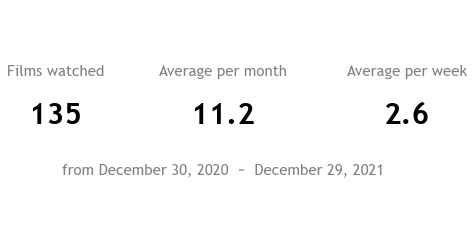

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams    

# open file and store to df
f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')
df = pd.read_json(f)
df = pd.to_datetime(df['watch_date'])

# find total movies
total = len(df)

# find period (in months) between first and last record
months = (max(df).year - min(df).year)*12 + (max(df).month - min(df).month)

per_month = total/months

# find period (in weeks) between first and last record
weeks = (max(df) - min(df)).days//7

per_week = total/weeks

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

# plot stats as texts
plt.text(x=0.0, y=0.7, s='Films watched', va='center', ha='center', fontsize=15, color='gray')
plt.text(x=0.0, y=0.5, s=total, va='center', ha='center', fontsize=30, fontweight='semibold')
plt.text(x=0.5, y=0.7, s='Average per month', va='center', ha='center', fontsize=15, color='gray')
plt.text(x=0.5, y=0.5, s='{:.1f}'.format(per_month), va='center', ha='center', fontsize=30, fontweight='semibold')
plt.text(x=1.05, y=0.7, s='Average per week', va='center', ha='center', fontsize=15, color='gray')
plt.text(x=1.05, y=0.5, s='{:.1f}'.format(per_week), va='center', ha='center', fontsize=30, fontweight='semibold')
plt.text(x=0.5, y=0.25, s='from {}  ~  {}'.format(min(df).strftime('%B %d, %Y'), max(df).strftime('%B %d, %Y')), va='center', ha='center', fontsize=15, color='gray')
plt.axis('off')

# save plot figure
plt.savefig("./results/1_stats_text.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

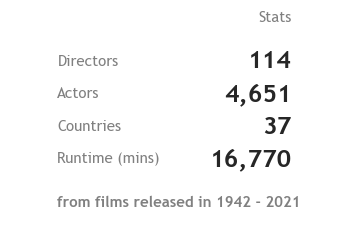

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams  

# open file and store to df
f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')
df = pd.read_json(f)

# store column data to respective variables
director = df['director']
actor = df['actor']
country = df['country']
runtime = df['runtime']
released_year = df['released_year']

# explode the list and get the number of unique directors, actors and countries
directors = director.explode().nunique()
actors = actor.explode().nunique()
countries = country.explode().nunique()

# get total runtime
total_runtime = sum(runtime)

# get the earliest and latest released year
earliest = min(released_year)
latest = max(released_year)

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

# plot stats as texts
plt.text(x=0.85, y=0.95, s='Stats', va='center', ha='right', fontsize=15, color='gray')
plt.text(x=0.15, y=0.75, s='Directors', va='center', ha='left', fontsize=15, color='gray')
plt.text(x=0.85, y=0.75, s=f'{directors:,}', va='center', ha='right', fontsize=25, fontweight='semibold')
plt.text(x=0.15, y=0.6, s='Actors', va='center', ha='left', fontsize=15, color='gray')
plt.text(x=0.85, y=0.6, s=f'{actors:,}', va='center', ha='right', fontsize=25, fontweight='semibold')
plt.text(x=0.15, y=0.45, s='Countries', va='center', ha='left', fontsize=15, color='gray')
plt.text(x=0.85, y=0.45, s=f'{countries:,}', va='center', ha='right', fontsize=25, fontweight='semibold')
plt.text(x=0.15, y=0.3, s='Runtime (mins)', va='center', ha='left', fontsize=15, color='gray')
plt.text(x=0.85, y=0.3, s=f'{total_runtime:,}', va='center', ha='right', fontsize=25, fontweight='semibold')
plt.text(x=0.15, y=0.1, s=f'from films released in {earliest} - {latest}', va='center', ha='left', fontsize=15, color='gray', fontweight='semibold')
plt.axis('off')

# save plot figure
plt.savefig("./results/2_additionalStats_text.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

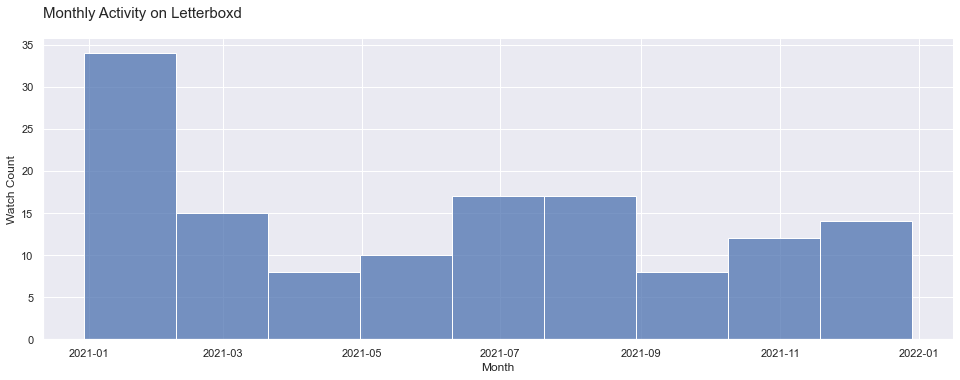

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.dates as mdates


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['watch_date']
df = pd.to_datetime(df)
df = df.sort_values().reset_index(drop=True)

sns.set_theme()
# rcParams['font.family'] = ['sans-serif']
# rcParams['font.sans-serif'] = ['Trebuchet MS']

fig = sns.displot(data=df, aspect=len(df)/50)
plt.title("Monthly Activity on Letterboxd", fontsize=15, loc="left", y=1.05)
plt.xlabel("Month")
plt.ylabel("Watch Count")

# fig.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

3_monthly_distribution_text.png generated.


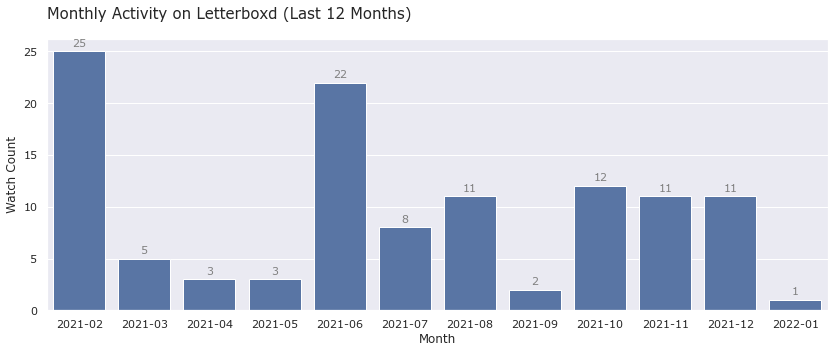

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams  


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

# get year-month information
dates = df['watch_date']
dates = pd.to_datetime(dates)
dates = dates.dt.strftime('%Y-%m')

# count occurences
dates_count =  pd.DataFrame(pd.date_range(min(dates), max(dates), freq='MS'), columns=['Month'])
dates_count['Month'] = dates_count['Month'].dt.strftime('%Y-%m')
dates_count['Count'] = 0

dates = dates.value_counts()

# sort months
for month in dates.index:
    match_index = dates_count.loc[dates_count['Month'] == month].index[0]
    dates_count.iloc[match_index, 1] = dates[month]


sns.set_theme()
plt.figure(figsize=[12+2,5])

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Verdana']

fig = sns.barplot(data=dates_count[len(dates_count)-12:], x='Month', y='Count', color='b', dodge=False)
plt.title("Monthly Activity on Letterboxd (Last 12 Months)", fontsize=15, loc="left", y=1.05)
plt.xlabel("Month")
plt.ylabel("Watch Count")
fig.bar_label(fig.containers[0], padding=3, fontsize=11, color='grey')

# save plot figure
plt.savefig("./results/3_monthly_distribution_text.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

print("3_monthly_distribution_text.png generated.")

In [74]:
len(dates_count)

12

In [51]:
dates_count

,Month,Count
0,2020-12,2
1,2021-01,22
2,2021-02,25
3,2021-03,5
4,2021-04,3
5,2021-05,3
6,2021-06,21
7,2021-07,8
8,2021-08,11
9,2021-09,0


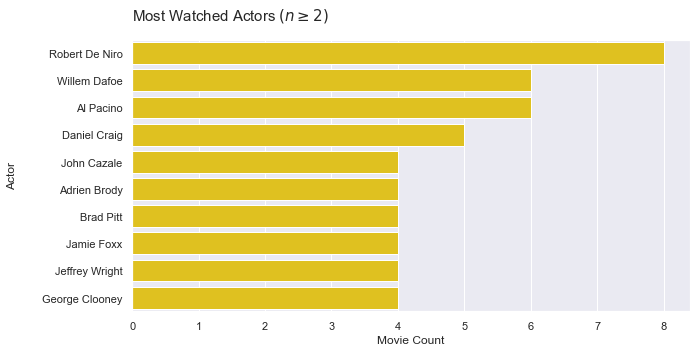

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

# count occurences
df = df['actor']
df = [item for sublist in df for item in sublist] # deconstruct object inside object in json
df = pd.DataFrame(df)
df.rename(columns={0:'Actor'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')
df = df[df["Movie Count"] >= 2]

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:(10 if len(df)>10 else len(df))], x="Movie Count", y="Actor", color='gold')
plt.title('Most Watched Actors '+r'$(n \geq 2)$', fontsize=15, y=1.05, loc="left")
fig.yaxis.labelpad = 25

# save plot figure
plt.savefig("./results/x_actor_watched_text.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

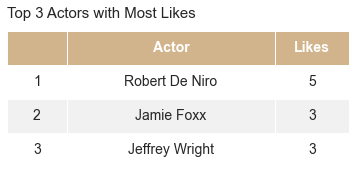

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import six


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['actor', 'like']]
df = df.explode('actor')
df = df.value_counts().reset_index(name="Likes")
df = df[df['like'] == True]
df = df.rename(columns={'actor': 'Actor'}).reset_index(drop=True)
df = df.drop(columns=['like'])
df.index += 1
df = df[:3]

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=df.columns.insert(0, df.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in df.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(df)

ax = render_table(df, header_columns=0, col_width=sum(widths)/15, colWidths=widths, cellLoc='center', header_color="tan")
plt.title("Top 3 Actors with Most Likes", fontsize=15, y=1.05, loc='left')

plt.show()

4_day_distribution.png generated.


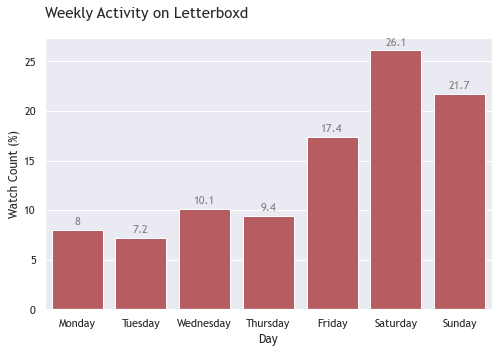

In [60]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

# define days
day = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=day, ordered=True)

# count occurences
df = df['watch_date']
df = pd.to_datetime(df)
df = df.dt.day_name()
df = df.astype(day_type)
df = df.value_counts(normalize=True).mul(100).round(1).reset_index(name='Movie Count').rename(columns={'index':'Day'})
df = df.sort_values('Day').reset_index(drop=True)

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[8,5])
fig = sns.barplot(data=df,x="Day", y="Movie Count", color='r')
plt.title("Weekly Activity on Letterboxd", fontsize=15, loc="left", y=1.05)
plt.xlabel("Day")
plt.ylabel("Watch Count (%)")
fig.bar_label(fig.containers[0], padding=3, color='grey', fontsize=11)

# save plot figure
plt.savefig("./results/4_day_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

print("4_day_distribution.png generated.")

5_genre_distribution.png generated.


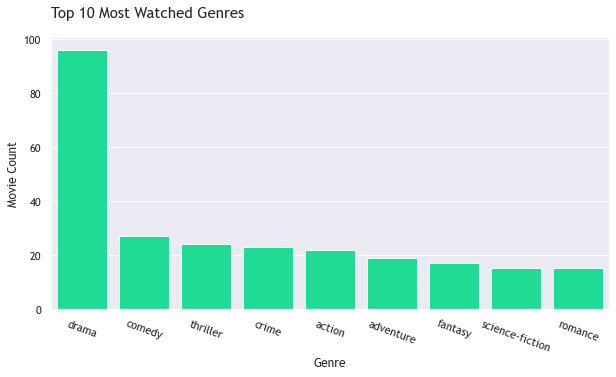

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['genre']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Genre'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:9], x="Genre", y="Movie Count", color='mediumspringgreen')
plt.xticks(rotation=-20)
plt.title("Top 10 Most Watched Genres", fontsize=15, y=1.05, loc="left")

# save plot figure
plt.savefig("./results/5_genre_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

print("5_genre_distribution.png generated.")

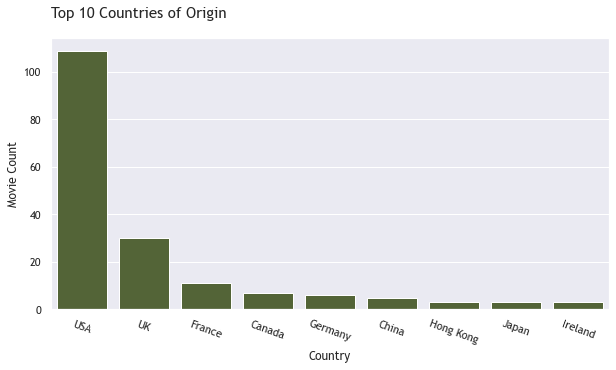

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['country']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Country'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:9], x="Country", y="Movie Count", color='darkolivegreen')
plt.xticks(rotation=-20)
plt.title("Top 10 Countries of Origin", fontsize=15, y=1.05, loc="left")

# save plot figure
plt.savefig("./results/6_country_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

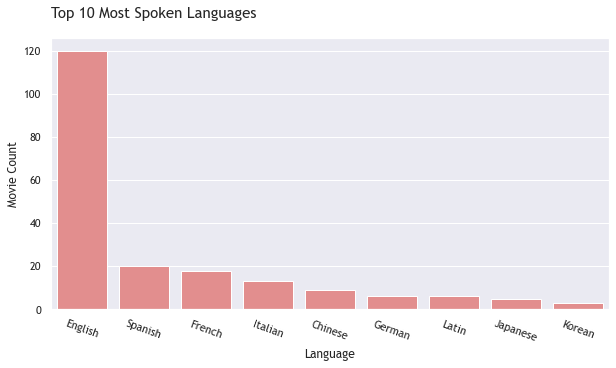

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['language']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Language'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:9], x="Language", y="Movie Count", color='lightcoral')
plt.xticks(rotation=-20)
plt.title("Top 10 Most Spoken Languages", fontsize=15, y=1.05, loc="left")

# save plot figure
plt.savefig("./results/7_language_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

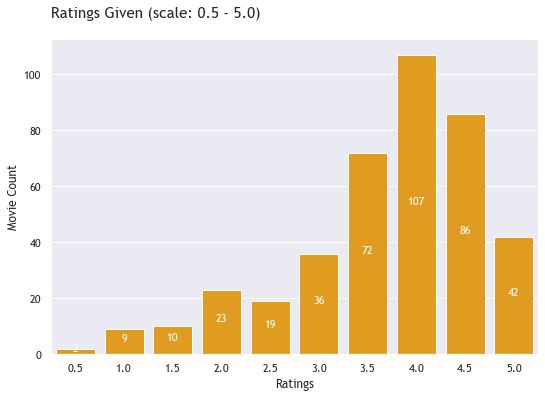

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['my_rating']
df = [str(rating) for rating in df]
df = pd.DataFrame(df)
df.rename(columns={0:'Ratings'}, inplace=True)

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

fig = sns.catplot(x="Ratings",data=df, kind="count", order=[str(x) for x in np.arange(0.5,5.1,0.5)], color='orange', aspect=1.5)
plt.ylabel("Movie Count")
plt.title("Ratings Given (scale: 0.5 - 5.0)", fontsize=15, loc="left", y=1.05)
for ax in fig.axes.flatten():
    ax.bar_label(ax.containers[0], padding=3, label_type='center', color='w', fontsize=11)

# save plot figure
plt.savefig("./results/8_ratings_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

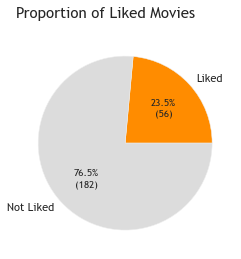

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['like']
total = len(df)
df = df.value_counts().reset_index(name='Movie Count').rename(columns={'index':'Liked'})
if len(df)==1 and df.loc[0, "like"]==False: df.loc[1] = [True, 0]
if len(df)==1 and df.loc[0, "like"]==True: df.loc[1] = [False, 0]
df = df.sort_values('Liked', ascending=False)

plt.style.use('ggplot')

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

labels = 'Liked', 'Not Liked'
plt.pie(data=df, x="Movie Count", autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total*p/100), colors=['darkorange','gainsboro'], labels=labels)
plt.title("Proportion of Liked Movies", fontsize=15, y=1.05, loc="left")

# save plot figure
plt.savefig("./results/9_like_percent.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

Text(0.0, 1.05, 'Proportion of Rewatches')

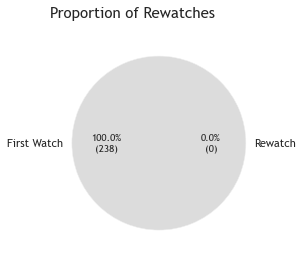

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['rewatch']
total = len(df)
df = df.value_counts().reset_index(name='Movie Count').rename(columns={'index':'Rewatch'})
if len(df)==1 and df.loc[0, "Rewatch"]==False: df.loc[1] = [True, 0]
if len(df)==1 and df.loc[0, "Rewatch"]==True: df.loc[1] = [False, 0]
df = df.sort_values('Rewatch', ascending=False)

plt.style.use('ggplot')

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

labels = 'Rewatch', 'First Watch'
plt.pie(data=df, x="Movie Count", autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total*p/100), colors=['limegreen','gainsboro'], labels=labels)
plt.title("Proportion of Rewatches", fontsize=15, y=1.05, loc="left")

# save plot figure
plt.savefig("./results/10_rewatch_percent.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

In [218]:
if len(df)==1 and df.loc[0, "Rewatch"]==False: df.loc[1] = [True, 0]
df

,Rewatch,Movie Count
0,False,238
1,True,0


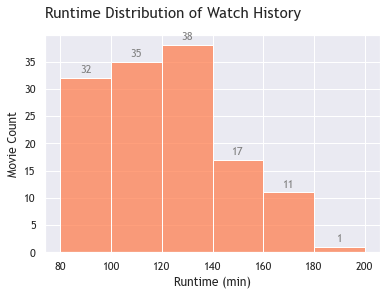

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['runtime']
df = df.sort_values().reset_index(drop=True)

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

fig = sns.histplot(data=df, binwidth=20, binrange=[80,200], color="coral")
plt.title("Runtime Distribution of Watch History", fontsize=15, loc="left", y=1.05)
plt.xlabel("Runtime (min)")
plt.ylabel("Movie Count")
fig.bar_label(fig.containers[0], padding=3, fontsize=11, color='grey')

# save plot figure
plt.savefig("./results/11_runtime_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

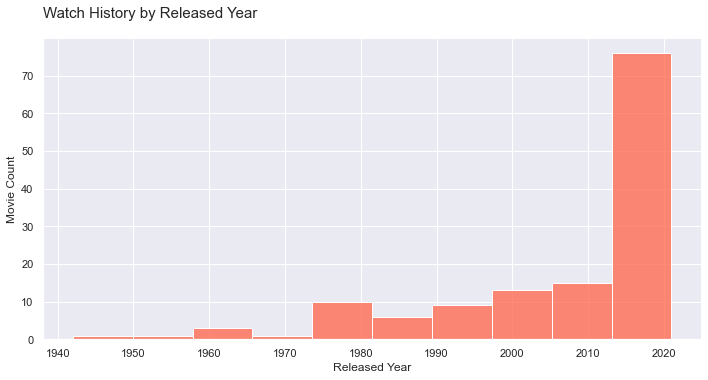

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['released_year']
df = df.sort_values().reset_index(drop=True)

sns.set_theme()

fig = sns.displot(data=df, aspect=2, color="tomato")

plt.title("Watch History by Released Year", fontsize=15, loc="left", y=1.05)
plt.xlabel("Released Year")
plt.ylabel("Movie Count")

plt.show(fig)

[Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

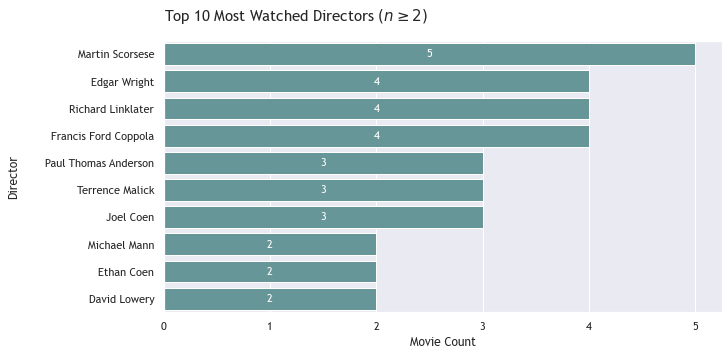

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['director']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Director'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')
df = df[df["Movie Count"] >= 2]

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:(10 if len(df)>10 else len(df))], x="Movie Count", y="Director", color='cadetblue')
plt.title('Top 10 Most Watched Directors '+r'$(n \geq 2)$', fontsize=15, y=1.05, loc="left")
fig.yaxis.labelpad = 25
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.bar_label(fig.containers[0], label_type='center', color='w', fontsize=11)

# save plot figure
#plt.savefig("./results/12_director_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

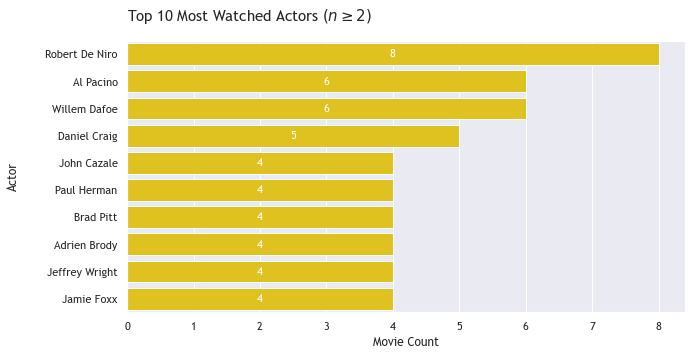

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

# count occurences
df = df['actor']
df = [item for sublist in df for item in sublist] # deconstruct object inside object in json
df = pd.DataFrame(df)
df.rename(columns={0:'Actor'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')
df = df[df["Movie Count"] >= 2]

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:(10 if len(df)>10 else len(df))], x="Movie Count", y="Actor", color='gold')
plt.title('Top 10 Most Watched Actors '+r'$(n \geq 2)$', fontsize=15, y=1.05, loc="left")
fig.yaxis.labelpad = 25
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.bar_label(fig.containers[0], label_type='center', color='w', fontsize=11)

# save plot figure
plt.savefig("./results/13_actor_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

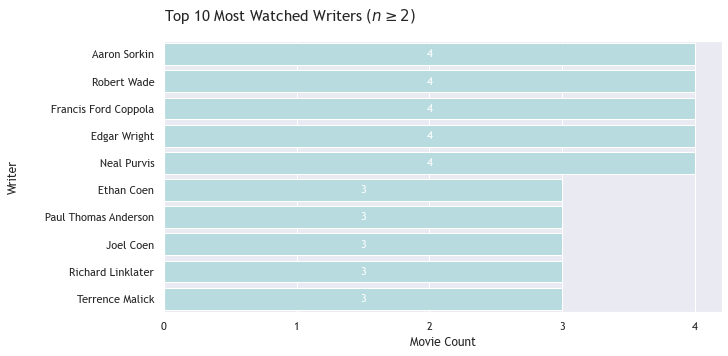

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['writer']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Writer'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')
df = df[df["Movie Count"] >= 2]
# df['Movie Count'] = df['Movie Count'].astype(int)

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:(10 if len(df)>10 else len(df))], x="Movie Count", y="Writer", color='powderblue')
plt.title('Top 10 Most Watched Writers '+r'$(n \geq 2)$', fontsize=15, y=1.05, loc="left")
fig.yaxis.labelpad = 25
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.bar_label(fig.containers[0], label_type='center', color='w', fontsize=11)

# save plot figure
plt.savefig("./results/14_writer_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

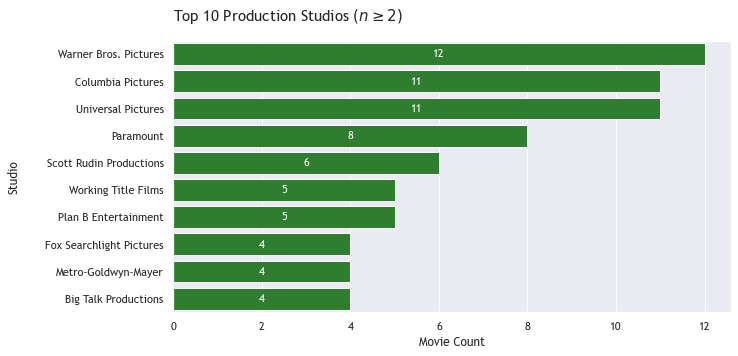

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df['studio']
df = [item for sublist in df for item in sublist]
df = pd.DataFrame(df)
df.rename(columns={0:'Studio'}, inplace=True)
df = df.value_counts().reset_index(name='Movie Count')
df = df[df["Movie Count"] >= 2]

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[10,5])
fig = sns.barplot(data=df[:(10 if len(df)>10 else len(df))], x="Movie Count", y="Studio", color='forestgreen')
plt.title('Top 10 Production Studios '+r'$(n \geq 2)$', fontsize=15, y=1.05, loc="left")
fig.yaxis.labelpad = 25
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.bar_label(fig.containers[0], label_type='center', color='w', fontsize=11)

# save plot figure
plt.savefig("./results/15_studio_distribution.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

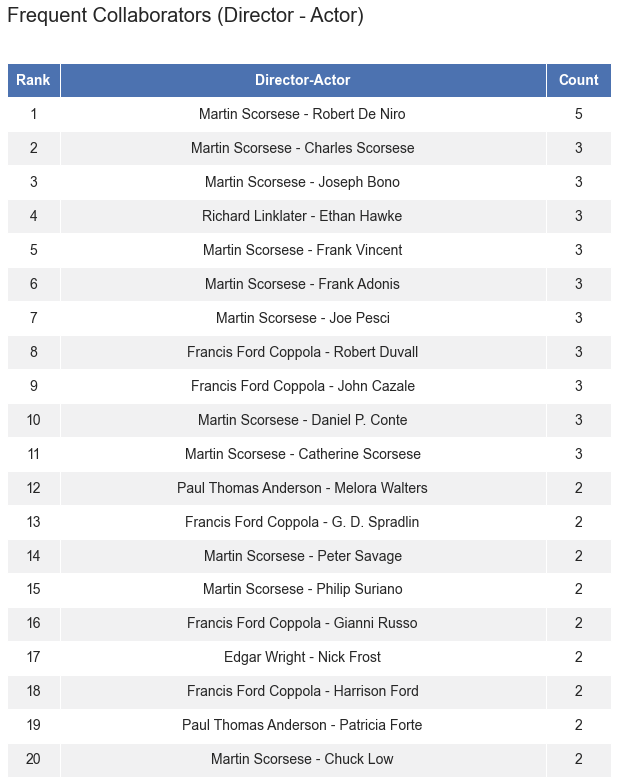

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import six

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df.explode("director").explode("actor")

table = df[['director', 'actor']].copy()
table = table[table['director'] != table['actor']]
table = pd.DataFrame(table.value_counts().reset_index(name="Count"))
table = table[table['Count'] >= 2]
table['Director-Actor'] = table['director'] + ' - ' + table['actor']
table = table[['Director-Actor', 'Count']]
table = table[:20] if len(table) >= 20 else table
table.index.name = 'Rank'
table.index += 1

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=data.columns.insert(0, data.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in data.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(table)

ax = render_table(table, header_columns=0, col_width=sum(widths)/17, colWidths=widths, cellLoc='center', header_color="b")
plt.title("Frequent Collaborators (Director - Actor)", fontsize=20, y=1.05, loc='left')
plt.show()


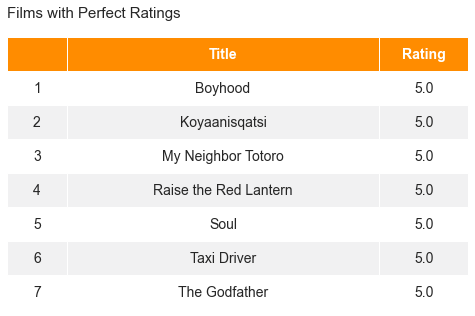

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['title', 'my_rating']]
df = df[df['my_rating'] >= 5]
df = df.sort_values('title')
df = df.rename(columns={'title': 'Title', 'my_rating': 'Rating'})
df = df.reset_index(drop=True)
df.index += 1

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=df.columns.insert(0, df.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in df.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(df)

ax = render_table(df, header_columns=0, col_width=sum(widths)/15, colWidths=widths, cellLoc='center', header_color="darkorange")
plt.title("Films with Perfect Ratings", fontsize=15, y=1.05, loc='left')
plt.show()

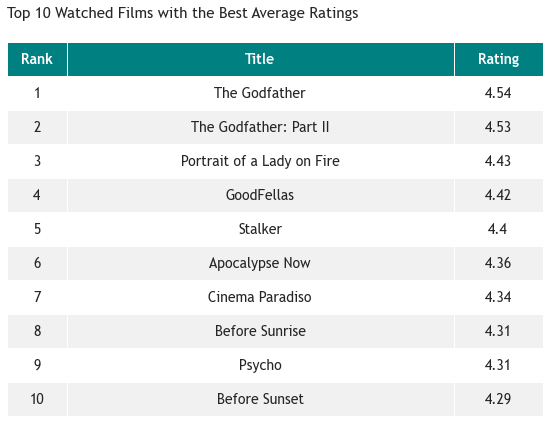

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['title', 'rating']]
df.columns = [column.capitalize() for column in df.columns]
df = df.sort_values('Rating', ascending=False).reset_index(drop=True)
df = df[:10].round(2)
df.reset_index(drop=True, inplace=True)
df.index.name = 'Rank'
df.index += 1

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=df.columns.insert(0, df.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in df.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(df)

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

ax = render_table(df, header_columns=0, col_width=sum(widths)/15, colWidths=widths, cellLoc='center', header_color="teal")
plt.title("Top 10 Watched Films with the Best Average Ratings", fontsize=15, y=1.05, loc='left')

# save plot figure
plt.savefig("./results/16_highestAvgRating_table.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

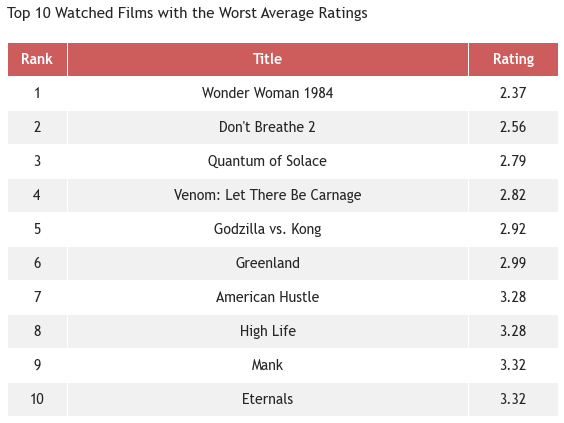

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['title', 'rating']]
df.columns = [column.capitalize() for column in df.columns]
df = df.sort_values('Rating').reset_index(drop=True)
df = df[:10].round(2)
df.reset_index(drop=True, inplace=True)
df.index.name = 'Rank'
df.index += 1

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=df.columns.insert(0, df.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in df.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(df)

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

ax = render_table(df, header_columns=0, col_width=sum(widths)/15, colWidths=widths, cellLoc='center', header_color="indianred")
plt.title("Top 10 Watched Films with the Worst Average Ratings", fontsize=15, y=1.05, loc='left')

# save plot figure
plt.savefig("./results/17_lowestAvgRating_table.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

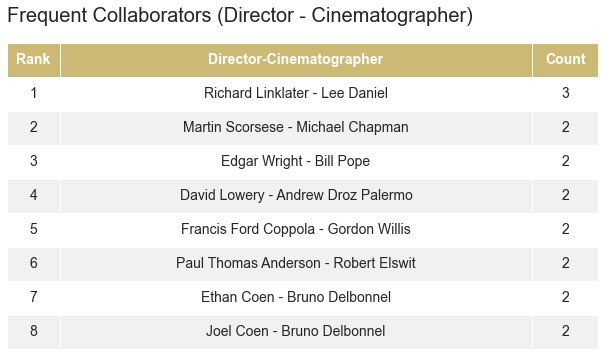

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import six

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df.explode("director").explode("cinematographer")

table = df[['director', 'cinematographer']].copy()
table = table[table['director'] != table['cinematographer']]
table = pd.DataFrame(table.value_counts().reset_index(name="Count"))
table = table[table['Count'] >= 2]
table['Director-Cinematographer'] = table['director'] + ' - ' + table['cinematographer']
table = table[['Director-Cinematographer', 'Count']]
table = table[:20] if len(table) >= 20 else table
table.index.name = 'Rank'
table.index += 1

def render_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 2, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.to_records(), bbox=bbox, colLabels=data.columns.insert(0, data.index.name), **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def max_widths(data):
    measurer = np.vectorize(len)
    max_lengths = measurer(data.to_numpy().astype(str)).max(axis=0)
    max_lengths = np.insert(max_lengths, 0, len(str(len(df))))
    
    i = 0
    for name in data.columns.insert(0, df.index.name):
        if len(str(name)) > max_lengths[i]: max_lengths[i] = len(str(name))
        i += 1

    return max_lengths

widths = max_widths(table)

ax = render_table(table, header_columns=0, col_width=sum(widths)/17, colWidths=widths, cellLoc='center', header_color="y")
plt.title("Frequent Collaborators (Director - Cinematographer)", fontsize=20, y=1.05, loc='left')
plt.show()


Text(0.0, 1.05, 'Distribution of Given Ratings, Grouped by Century')

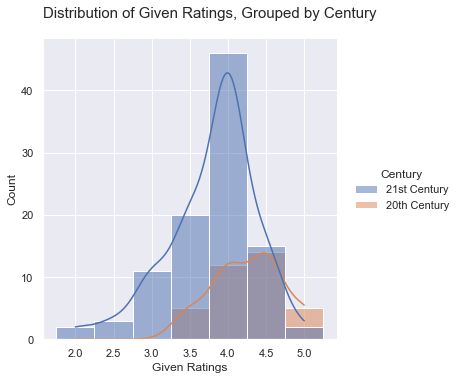

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype


f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['released_year','my_rating']]

df['my_rating'] = [str(rating) for rating in df['my_rating']]
rating_order = [str(x) for x in np.arange(0.5,5.1,0.5)]
rating_type = CategoricalDtype(categories=rating_order, ordered=True)
df['my_rating'] = df['my_rating'].astype(rating_type)
df["Century"] = np.where(df["released_year"] > 1999, "21st Century", "20th Century")
df = df.rename(columns={'my_rating': 'Given Ratings'})

sns.set_theme()

fig = sns.displot(data=df, x="Given Ratings", hue="Century", kde=True)
plt.title("Distribution of Given Ratings, Grouped by Century", fontsize=15, y=1.05, loc='left')

Text(0.5399999999999999, 15, 'Avg. Ratings')

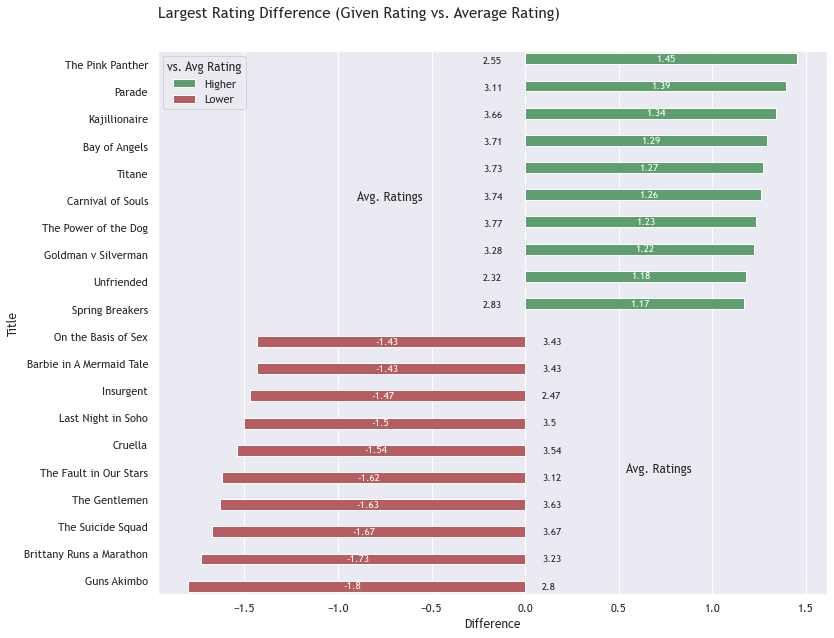

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.patches import FancyBboxPatch
from matplotlib.path import get_path_collection_extents

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[df['my_rating'] != 0]
df = df[['title', 'rating', 'my_rating']]
df['diff'] = df['my_rating'] - df['rating']
df = df.sort_values('diff', ascending=False)
df = pd.concat([df.head(10), df.tail(10)]).reset_index(drop=True)
df["vs. Avg Rating"] = np.where(df["diff"] > 0, "Higher", "Lower")
df = df.rename(columns={'title': 'Title', 'diff': 'Difference'})

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

plt.figure(figsize=[12,10])
fig = sns.barplot(x="Difference", y="Title", data=df, hue="vs. Avg Rating", palette=['g','r'])
plt.title("Largest Rating Difference (Given Rating vs. Average Rating)", fontsize=15, y=1.05, loc='left')
fig.bar_label(fig.containers[0], color='w', fontsize=10, padding=5, label_type='center')
fig.bar_label(fig.containers[1], color='w', fontsize=10, padding=5, label_type='center')

for i,y in enumerate(fig.get_yticks()):
    if df["vs. Avg Rating"][i] == 'Higher': plt.annotate(round(df["rating"][i],2), (0.125*min(df["Difference"]),y-0.05), fontsize=10)
    else: plt.annotate(round(df["rating"][i],2), (-0.05*min(df["Difference"]),y+0.3), fontsize=10)

plt.annotate("Avg. Ratings", (0.5*min(df["Difference"]), 5))
plt.annotate("Avg. Ratings", (-0.3*min(df["Difference"]), 15))
        
# save plot figure
plt.savefig("./results/18_ratingDifference_bar.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

,title,director,tagline,synopsis,link,released_year,actor,producer,writer,editor,...,studio,country,language,genre,rating,runtime,watch_date,my_rating,like,rewatch
1,"Summer of Soul (...or, When the Revolution Cou...",[Ahmir-Khalib Thompson],A Questlove Jawn,"During the same summer as Woodstock, over 300,...",https://letterboxd.com/film/summer-of-soul-or-...,2021,"[Stevie Wonder, Lin-Manuel Miranda, Jesse Jack...","[Davis Guggenheim, Robert Fyvolent, Jon Kamen,...",[Joshua L. Pearson],[Shawn Peters],...,"[Concordia Studio, Mass Distraction Media, Rad...",[USA],[English],"[documentary, music]",4.16,117,2021/12/30,4.0,True,False
2,The Matrix Revolutions,"[Lilly Wachowski, Lana Wachowski]",Everything that has a beginning has an end.,The human city of Zion defends itself against ...,https://letterboxd.com/film/the-matrix-revolut...,2003,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","[Joel Silver, Bruce Berman, Andrew Mason, Gran...","[Lilly Wachowski, Lana Wachowski]",[Zach Staenberg],...,"[Village Roadshow Pictures, NPV Entertainment,...",[USA],"[English, French]","[adventure, action, science-fiction, thriller]",2.97,129,2021/12/23,3.0,True,False
3,The Matrix Resurrections,[Lana Wachowski],Return to the source.,"Plagued by strange memories, Neo's life takes ...",https://letterboxd.com/film/the-matrix-resurre...,2021,"[Keanu Reeves, Carrie-Anne Moss, Yahya Abdul-M...","[Bruce Berman, Grant Hill, Lana Wachowski, Jam...","[Lana Wachowski, David Mitchell, Aleksandar He...",[Joseph Jett Sally],...,"[Warner Bros. Pictures, Village Roadshow Pictu...","[Germany, USA]",[English],"[action, science-fiction]",3.06,148,2021/12/27,4.0,True,False
4,When Harry Met Sally...,[Rob Reiner],Can two friends sleep together and still love ...,"During their travel from Chicago to New York, ...",https://letterboxd.com/film/when-harry-met-sally/,1989,"[Billy Crystal, Meg Ryan, Carrie Fisher, Bruno...","[Rob Reiner, Andrew Scheinman, Nora Ephron, St...",[Nora Ephron],[Robert Leighton],...,"[Castle Rock Entertainment, Nelson Entertainment]",[USA],[English],"[comedy, romance, drama]",3.97,96,2021/12/28,4.5,True,False
5,Hard Eight,[Paul Thomas Anderson],"When good luck is a long shot, you have to hed...",A stranger mentors a young Reno gambler who we...,https://letterboxd.com/film/hard-eight/,1996,"[Philip Baker Hall, Gwyneth Paltrow, John C. R...","[John S. Lyons, Robert Jones, François Duplat,...",[Paul Thomas Anderson],[Barbara Tulliver],...,"[Trinity Filmed Entertainment, Rysher Entertai...",[USA],[English],"[crime, drama]",3.59,102,2021/12/20,2.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Pierrot le Fou,[Jean-Luc Godard],None,Pierrot escapes his boring society and travels...,https://letterboxd.com/film/pierrot-le-fou/,1965,"[Jean-Paul Belmondo, Anna Karina, Graziella Ga...",[Georges de Beauregard],"[Lionel White, Jean-Luc Godard]",[Françoise Collin],...,"[Dino de Laurentiis Cinematografica, Rome Pari...","[France, Italy]",[French],"[thriller, drama]",3.99,110,2021/12/07,4.0,True,False
465,The Matrix,"[Lilly Wachowski, Lana Wachowski]",Welcome to the Real World.,"Set in the 22nd century, The Matrix tells the ...",https://letterboxd.com/film/the-matrix/,1999,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","[Barrie M. Osborne, Joel Silver, Bruce Berman,...","[Lilly Wachowski, Lana Wachowski]",[Zach Staenberg],...,"[Village Roadshow Pictures, Groucho II Film Pa...","[Australia, USA]",[English],"[science-fiction, action]",4.16,136,2021/12/07,5.0,True,False
466,The Matrix Reloaded,"[Lilly Wachowski, Lana Wachowski]",Free your mind.,Six months after the events depicted in The Ma...,https://letterboxd.com/film/the-matrix-reloaded/,2003,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","[Joel Silver, Bruce Berman, Debra James, Andre...","[Lilly Wachowski, Lana Wachowski]",[Zach Staenberg],...,"[Village Roadshow Pictures, Silver Pictures, N...",[USA],[English],"[action, adventure, science-fict

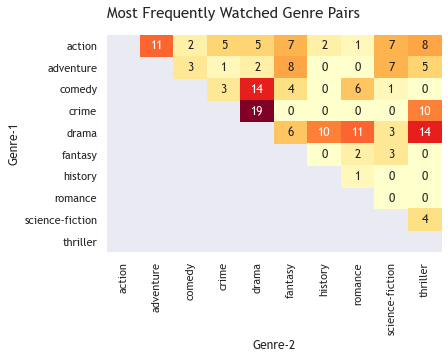

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

top_genres = df['genre']
top_genres = [item for sublist in top_genres for item in sublist]
top_genres = pd.DataFrame({'Genres': top_genres})
top_genres = top_genres.value_counts().reset_index(name='Movie Count')
top_genres = top_genres[:10]

table = pd.DataFrame(product(top_genres['Genres'], top_genres['Genres']))
table = table.rename(columns={0: 'Genre-1', 1:'Genre-2'})
table['count'] = 0

df = df['genre']

# count occurences
for i in range(len(table)):
    for j in range(len(df)):
        if set([table.iloc[i,0],table.iloc[i,1]]).issubset(df[j]) and table.iloc[i,0]!=table.iloc[i,1]: table.iloc[i,2] += 1

# apply pivot and filter out duplicates
pivot = table.pivot("Genre-1", "Genre-2", "count")
pivot = pivot.where(np.triu(np.ones(pivot.shape), k=1).astype(bool))

sns.set_theme()

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

sns.heatmap(pivot, cmap="YlOrRd", annot=True, cbar=False)
plt.title("Most Frequently Watched Genre Pairs", fontsize=15, y=1.05, loc='left')

# save plot figure
plt.savefig("./results/19_genrePairs_heatmap.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

Text(0.0, 1.05, 'Genre Performances by Given Ratings')

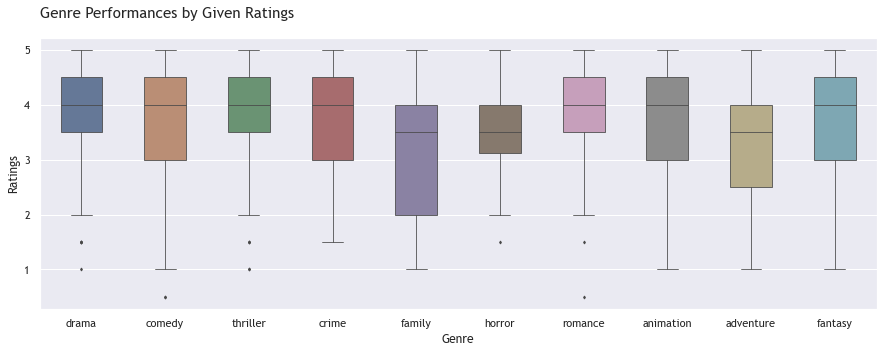

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

top_genres = df['genre']
top_genres = [item for sublist in top_genres for item in sublist]
top_genres = pd.DataFrame({'Genres': top_genres})
top_genres = top_genres.value_counts().reset_index(name='Movie Count')
top_genres = top_genres[:10]

df = df[df['my_rating'] != 0]
df = df[['title', 'genre', 'my_rating']]
df = df.explode('genre')
df = df[df['genre'].str.contains('|'.join(top_genres['Genres']))]
df = df.rename(columns={'genre': 'Genre', 'my_rating': 'Ratings'})

plt.figure(figsize=[15,5])

# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

fig = sns.boxplot(data=df, x="Genre", y="Ratings", order=top_genres['Genres'], saturation=0.5, width=0.5, linewidth=0.8, fliersize=2)
plt.title("Genre Performances by Given Ratings", fontsize=15, y=1.05, loc='left')

# save plot figure
plt.savefig("./results/20_genrePerformance_boxplot.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

21_marathon_timeline_1.png generated.
21_marathon_timeline_2.png generated.


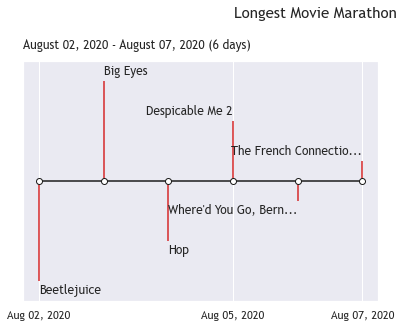

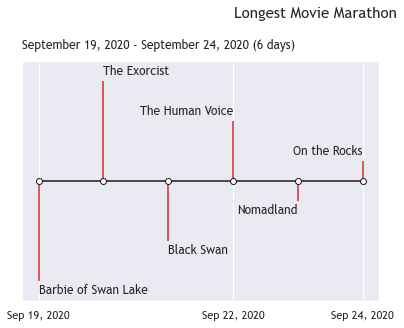

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib import rcParams

f = open('d:/Projects/WebDev Intro/webscraping-scrapy-letterboxd//letterboxd/scraped.json')

df = pd.read_json(f)

df = df[['watch_date','title']]
df['watch_date'] = pd.to_datetime(df['watch_date'])
df = df.sort_values('watch_date').reset_index(drop=True)

# count consecutive days
y = df['watch_date']
x = y.groupby((y != y.shift() + pd.DateOffset(1)).cumsum()).cumcount() + 1

df['consecutives'] = x
max_consecutives = max(df['consecutives'])
endpoints = df[df['consecutives'] == max_consecutives]

consecutives = []
for end in endpoints.index.values:
    start = end - max_consecutives + 1
    timeline = pd.DataFrame(df[start:end+1])
    consecutives.append(timeline)
    
# configure font
rcParams['font.family'] = ['sans-serif']
rcParams['font.sans-serif'] = ['Trebuchet MS']

for i in range(len(consecutives)):
    data = consecutives[i]
    title = data['title'].tolist()
    dates = data['watch_date'].tolist()

    # Choose some nice levels
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(len(data)/1.1, 4), constrained_layout=True)
    plt.rcParams['figure.facecolor'] = 'w'
    plt.suptitle("Longest Movie Marathon", fontsize=15, y=1.1, ha='right', x=1)
    plt.title("{} - {} ({} days)".format(dates[0].strftime('%B %d, %Y'), dates[-1].strftime('%B %d, %Y'), len(data)), fontsize=12, y=1.025, loc='left')

    ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-o",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # annotate lines
    j = 0
    for d, l, r in zip(dates, levels, title):
        if len(r) > 20: r = r[:20] + '...'
        ax.annotate(r, xy=(d, l),
                    xytext=(0, np.sign(l)*3), textcoords="offset points",
                    horizontalalignment="left" if j<len(data)/2 else "right",
                    verticalalignment="bottom" if l > 0 else "top")
        j += 1

    # format xaxis
    ax.set_xticks([date for date in [dates[0],dates[len(data)//2],dates[-1]]])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d, %Y"))

    # remove y axis and spines
    ax.yaxis.set_visible(False)

    ax.margins(y=0.1)
    
    # save plot figure
    plt.savefig(f"./results/21_marathon_timeline_{i+1}.png", facecolor='w', bbox_inches='tight', pad_inches=0.5, dpi=300)

    print(f"21_marathon_timeline_{i+1}.png generated.")